# Simple Polynomial Model

## Implementation of Single Node Model (Linear Equation)
For this example, we are given 12 data (for each month), and we expect the graph to fit to 4-degree polynomial equation
### Model
$$
y_n = (n^0, n^1, n^2, n^3, n^4)\cdot
\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4
\end{pmatrix}
= \sum_{m=0}^{4}w_mn^m \\
\textbf{y} = \textbf{Xw} \\
$$

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [16]:
# Build Layers
model = Sequential()
model.add(Dense(1, input_dim=5, \
                kernel_initializer='random_uniform', \
                bias_initializer='zeros'))

## Setting Optimizer for Training
### Mean Square Error
$$
E = \frac{1}{2} \sum_{n=1}^{12}(y_n - t_n)^2 \\
E(\textbf{w}) = \frac{1}{2} \sum_{n=1}^{12}\left(\sum_{m=0}^{4}w_mn^m - t_n\right)^2 
$$
### Gradient Descent Method (Adam Optimizer)
One of the key criteria of local minimum of function is the gradient $\frac{\partial E}{\partial w_m} = 0$.  
The gradient of function represent the direction where the maximum slope along the surface is.  
Gradient descent method suggest the discrete approach to local minima by moving in the opposite gradient direction from any point along the surface.  
$$
\textbf{w}^{\text{new}}=\textbf{w}-\epsilon\nabla E
$$
- $\epsilon$ represent the rate of learning

In [17]:
# Build Compiler
model.compile(optimizer='Adam',
              loss='mean_squared_error')

## Prepare Data
$$
\textbf{X} =
\begin{pmatrix}
1^0 & 1^1 & 1^2 & 1^3 & 1^4 \\
2^0 & 2^1 & 2^2 & 2^3 & 2^4 \\
3^0 & 3^1 & 3^2 & 3^3 & 3^4 \\
4^0 & 4^1 & 4^2 & 4^3 & 4^4 \\
\vdots\\ 
12^0 & 12^1 & 12^2 & 12^3 & 12^4 \\
\end{pmatrix}
, \quad
\textbf{w} =
\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4
\end{pmatrix}
$$

In [33]:
import numpy as np
import math

target = np.array([7.2, 9.3, 12.6, 14.9, 16.2, 17.8, 17.5, 16.4, 14.8, 13.5, 10.1, 8.6]) # 12 Data for each months
x = np.array([[m**p for p in range(0,5)] for m in range(1,13)])

## Training

In [34]:
model.fit(x, target, epochs=6000, verbose=0)

In [35]:
y = model.predict(x)

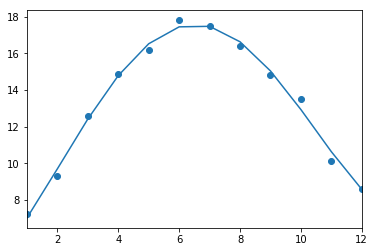

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), target)
subplot.plot(range(1,13), y)

## Notes:
- When building layers of NN, it is often important to initialize bias and kernel weights.